Disciplina: **Mineração de Dados**

Professor: **Wilson Castello Branco Neto**

Aula 10 - Support vector machines

Nome: Wilson Castello Branco Neto

Exemplo/Atividade 1: SVM e outros classificadores com dataset Iris (tipos de flores).

# **Parte 1** - Exemplo

# Carregamento e apresentação dos dados

Leitura e apresentação do Dataset. Os quatro atributos independentes são valores contínuos que representam:
*   Sepal.Length - Comprimento da Sépala
*   Sepal.Width - Largura da Sépala
*   Petal.Length - Comprimento da Pétala
*   Petal.Width - Largura da Sépala

O último atributo representa a espécie da planta, que pode ser setosa (0), versicolor (1) ou virginica (2).

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X4 = iris.data
y4 = iris.target
print ('Formato dos dados independentes: ',X4.shape)
print ('Formato dos resultados (classe): ',y4.shape)


Formato dos dados independentes:  (150, 4)
Formato dos resultados (classe):  (150,)


Apresenta os dados dos atributos dependentes (apenas os 10 primeiros registros).

In [3]:
X4[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Apresenta os dados do atributo independente (todos os registros).

In [4]:
y4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Realiza a transformação dos atributos dependentes usando a normalização padrão (Z-Score).

In [5]:
from sklearn.preprocessing import StandardScaler

tranform = StandardScaler()
X4 = tranform.fit_transform(X4)

X4[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

#Exemplo apenas com 2 atributos

Exclui as colunas relacionadas às pétalas para criar um modelo com base apenas nos dois primeiros atributos. Esta exclusão é feita para fins didáticos, para tornar possível a visualização das classes em um gráfico com apenas duas dimensões. Em uma situação real, os atributos só devem ser excluídos caso se identifique que eles são irrelevantes para a definição do valor objetivo.

In [6]:
X2 = X4[:,:2]
y2 = y4[:]

print(X2[:10])
print(y2)

[[-0.90068117  1.01900435]
 [-1.14301691 -0.13197948]
 [-1.38535265  0.32841405]
 [-1.50652052  0.09821729]
 [-1.02184904  1.24920112]
 [-0.53717756  1.93979142]
 [-1.50652052  0.78880759]
 [-1.02184904  0.78880759]
 [-1.74885626 -0.36217625]
 [-1.14301691  0.09821729]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


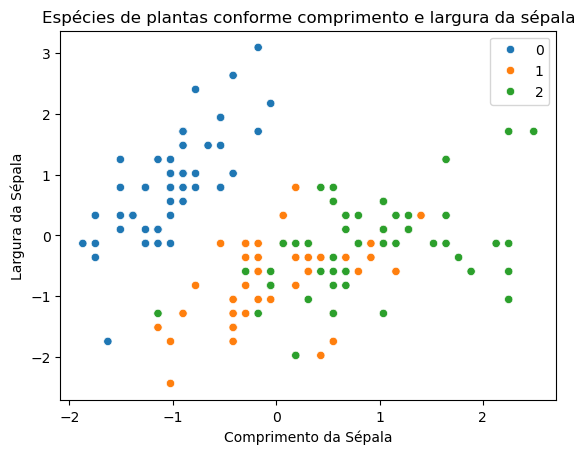

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=X2[:,0],y=X2[:,1], hue=y2, palette='tab10')
plt.title('Espécies de plantas conforme comprimento e largura da sépala')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.show()

Divide o dataset em dois conjuntos, um para treinamento e outro para teste.

In [8]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42, shuffle=True)

print('Formato dos dados de treinamento')
print (X_train2.shape, y_train2.shape)

print('Formato dos dados de teste')
print (X_test2.shape, y_test2.shape)


Formato dos dados de treinamento
(112, 2) (112,)
Formato dos dados de teste
(38, 2) (38,)


Cria e treina um modelo de classificação linear rígido do tipo perceptron. Em seguida apresenta os coeficientes da reta separadora e o valor da acurácia obtida.

In [9]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

modelo = Perceptron(random_state=0)
modelo.fit(X_train2, y_train2)
y_pred2 = modelo.predict(X_test2)
acc = accuracy_score(y_test2, y_pred2)

print('Coeficientes w1 e w2 das três retas')
print (modelo.coef_)
print('Coeficiente w0 das três retas')
print (modelo.intercept_)
print('Acurácia do modelo')
print(acc)

Coeficientes w1 e w2 das três retas
[[-1.76501198  1.05276654]
 [-0.84817509 -0.92078707]
 [ 2.16486595  0.72435249]]
Coeficiente w0 das três retas
[-1.  0. -2.]
Acurácia do modelo
0.7105263157894737


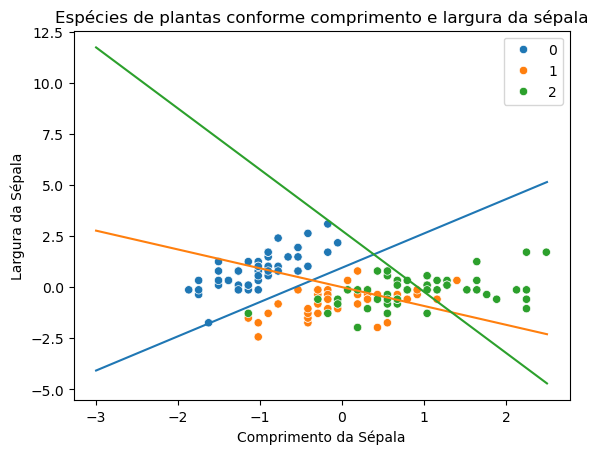

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.scatterplot(x=X2[:,0],y=X2[:,1], hue=y2, palette='tab10')
plt.title('Espécies de plantas conforme comprimento e largura da sépala')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
xs = np.arange(-3,3,0.5)
ys = (-modelo.intercept_[0]-xs*modelo.coef_[0,0])/modelo.coef_[0,1]
plt.plot(xs,ys)
ys = (-modelo.intercept_[1]-xs*modelo.coef_[1,0])/modelo.coef_[1,1]
plt.plot(xs,ys)
ys = (-modelo.intercept_[2]-xs*modelo.coef_[2,0])/modelo.coef_[2,1]
plt.plot(xs,ys)
plt.show()

Cria e treina um modelo de classificação linear esticástico. Em seguida apresenta os coeficientes da reta separadora e o valor da acurácia obtida.

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

modelo = SGDClassifier(random_state=0)
modelo.fit(X_train2, y_train2)
y_pred2 = modelo.predict(X_test2)
acc = accuracy_score(y_test2, y_pred2)

print('Coeficientes w1 e w2 das três retas')
print (modelo.coef_)
print('Coeficiente w0 das três retas')
print (modelo.intercept_)
print('Acurácia do modelo')
print(acc)

Coeficientes w1 e w2 das três retas
[[-31.77859188  15.45173017]
 [  5.89966898  -4.53527527]
 [  5.18414646  -2.66894801]]
Coeficiente w0 das três retas
[-25.63826661   1.15435441  -1.42578621]
Acurácia do modelo
0.6842105263157895


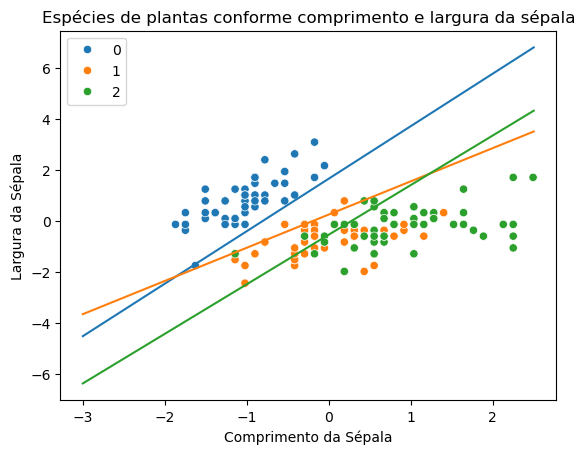

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.scatterplot(x=X2[:,0],y=X2[:,1], hue=y2, palette='tab10')
plt.title('Espécies de plantas conforme comprimento e largura da sépala')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
xs = np.arange(-3,3,0.5)
ys = (-modelo.intercept_[0]-xs*modelo.coef_[0,0])/modelo.coef_[0,1]
plt.plot(xs,ys)
ys = (-modelo.intercept_[1]-xs*modelo.coef_[1,0])/modelo.coef_[1,1]
plt.plot(xs,ys)
ys = (-modelo.intercept_[2]-xs*modelo.coef_[2,0])/modelo.coef_[2,1]
plt.plot(xs,ys)
plt.show()

Cria um SVM usando uma função de Kernel linear. Em seguida apresenta os coeficientes da reta separadora e o valor da acurácia obtida.

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

modelo = SVC(kernel='linear')
modelo.fit(X_train2, y_train2)
y_pred2 = modelo.predict(X_test2)
acc = accuracy_score(y_test2, y_pred2)

print('Coeficientes w1 e w2 das três retas')
print (modelo.coef_)
print('Coeficiente w0 das três retas')
print (modelo.intercept_)
print('Acurácia do modelo')
print(acc)

Coeficientes w1 e w2 das três retas
[[-2.06317741  1.08601944]
 [-1.85253172  0.78008843]
 [-1.08188936 -0.4274481 ]]
Coeficiente w0 das três retas
[-1.46496523 -0.79005204  0.36199527]
Acurácia do modelo
0.8421052631578947


Apresenta as retas separadoras do classificador linear do SVM

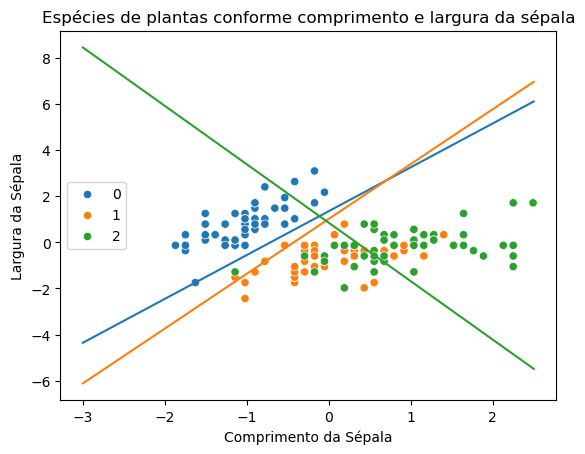

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.scatterplot(x=X2[:,0],y=X2[:,1], hue=y2, palette='tab10')
plt.title('Espécies de plantas conforme comprimento e largura da sépala')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
xs = np.arange(-3,3,0.5)
ys = (-modelo.intercept_[0]-xs*modelo.coef_[0,0])/modelo.coef_[0,1]
plt.plot(xs,ys)
ys = (-modelo.intercept_[1]-xs*modelo.coef_[1,0])/modelo.coef_[1,1]
plt.plot(xs,ys)
ys = (-modelo.intercept_[2]-xs*modelo.coef_[2,0])/modelo.coef_[2,1]
plt.plot(xs,ys)
plt.show()

# Exemplo com 4 atributos

Retorna aos dados originais, com os 4 atributos. Considerando o exemplo anterior, aqui já há um aumento nas dimensões do problema ao incluir os valores relacionados ao comprimento e a largura da pétala.

In [15]:
from sklearn.model_selection import train_test_split

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25, random_state=42, shuffle=True)

print('Formato dos dados de treinamento')
print (X_train4.shape, y_train4.shape)

print('Formato dos dados de teste')
print (X_test4.shape, y_test4.shape)


Formato dos dados de treinamento
(112, 4) (112,)
Formato dos dados de teste
(38, 4) (38,)


Cria e treina um modelo de classificação linear rígido. Em seguida apresenta os coeficientes da reta separadora e o valor da acurácia obtida.

In [16]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

modelo = Perceptron(random_state=0)
modelo.fit(X_train4, y_train4)
y_pred4 = modelo.predict(X_test4)
acc = accuracy_score(y_test4, y_pred4)

print('Coeficientes w1 e w2 das três retas')
print (modelo.coef_)
print('Coeficiente w0 das três retas')
print (modelo.intercept_)
print('Acurácia do modelo')
print(acc)

Coeficientes w1 e w2 das três retas
[[-0.55333328  0.36217625 -1.0469454  -0.79067065]
 [-0.13732359 -2.0380087   2.22575364 -3.02929533]
 [-1.32880765 -1.83850484  6.14185235  5.12751235]]
Coeficiente w0 das três retas
[-1. -2. -7.]
Acurácia do modelo
0.8947368421052632


Cria e treina um modelo de classificação linear estocástica. Em seguida apresenta os coeficientes da reta separadora e o valor da acurácia obtida.

In [17]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

modelo = SGDClassifier(random_state=0)
modelo.fit(X_train4, y_train4)
y_pred4 = modelo.predict(X_test4)
acc = accuracy_score(y_test4, y_pred4)

print('Coeficientes w1 e w2 das três retas')
print (modelo.coef_)
print('Coeficiente w0 das três retas')
print (modelo.intercept_)
print('Acurácia do modelo')
print(acc)

Coeficientes w1 e w2 das três retas
[[ -3.10338348   2.03127451  -5.87181943  -4.43449609]
 [ -5.61794268  -8.15390574   4.96437357  -9.42842305]
 [  3.47904043 -10.85954489  32.06690767  24.78212596]]
Coeficiente w0 das três retas
[-10.         -11.09024804 -35.93889543]
Acurácia do modelo
0.8421052631578947


Cria e treina um SVM linear, com valor de 1 para o parâmetro C. Em seguida apresenta os coeficientes da reta separadora e o valor da acurácia obtida.

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

modelo = SVC(kernel='linear', C=1)
modelo.fit(X_train4, y_train4)
y_pred4 = modelo.predict(X_test4)
acc = accuracy_score(y_test4, y_pred4)

print('Coeficientes w1 e w2 das três retas')
print (modelo.coef_)
print('Coeficiente w0 das três retas')
print (modelo.intercept_)
print('Acurácia do modelo')
print(acc)

Coeficientes w1 e w2 das três retas
[[-0.43857952  0.33213012 -0.89186902 -0.92278364]
 [-0.06473327  0.13858127 -0.553431   -0.55666399]
 [ 0.18306704  0.75376045 -2.40939766 -2.10017224]]
Coeficiente w0 das três retas
[-1.47333522 -0.2957917   3.0002107 ]
Acurácia do modelo
0.9736842105263158


# **Parte 2** - Atividade

Consulte a documentação do SVM disponível no link abaixo, para realizar as atividades a seguir.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

Crie diferentes classificadores SVM, alterando o tipo da função de Kernel utilizada (mantenha o parâmetro C = 1).

Analise os resultados para identificar qual função de Kernel levou ao melhor resultado. Além de apresentar a acurácia de cada modelo, apresente o tempo de processamento necessário para seu o treinamento e para a realização das predições.


Para cada tipo de função de Kernel, incremente o valor de C de 1 em 1, até C = 100, e analise os resultados de acurácia e tempo de processamento. Até que valor de C houve incremento na acurácia. O que aconteceu com o tempo de treinamento?

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

modelo = SVC(kernel='linear', C=1)
%timeit modelo.fit(X_train4, y_train4)
y_pred4 = modelo.predict(X_test4)
acc = accuracy_score(y_test4, y_pred4)

print('Coeficientes w1 e w2 das três retas')
print (modelo.coef_)
print('Coeficiente w0 das três retas')
print (modelo.intercept_)
print('Acurácia do modelo')
print(acc)

1.07 ms ± 121 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Coeficientes w1 e w2 das três retas
[[-0.43857952  0.33213012 -0.89186902 -0.92278364]
 [-0.06473327  0.13858127 -0.553431   -0.55666399]
 [ 0.18306704  0.75376045 -2.40939766 -2.10017224]]
Coeficiente w0 das três retas
[-1.47333522 -0.2957917   3.0002107 ]
Acurácia do modelo
0.9736842105263158


In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

modelo = SVC(kernel='poly', C=1)
%timeit modelo.fit(X_train4, y_train4)
y_pred4 = modelo.predict(X_test4)
acc = accuracy_score(y_test4, y_pred4)

print('Coeficiente w0 das três retas')
print (modelo.intercept_)
print(f'Acurácia do modelo: {acc}')
print(acc)

957 μs ± 133 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Coeficiente w0 das três retas
[-0.99840175 -0.75289112  1.076297  ]
Acurácia do modelo: 0.9736842105263158
0.9736842105263158


In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

modelo = SVC(kernel='rbf', C=1)
%timeit modelo.fit(X_train4, y_train4)
y_pred4 = modelo.predict(X_test4)
acc = accuracy_score(y_test4, y_pred4)

print('Coeficiente w0 das três retas')
print (modelo.intercept_)
print(f'Acurácia do modelo: {acc}')
print(acc)

1.01 ms ± 108 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Coeficiente w0 das três retas
[-0.01774946 -0.134451    0.02780951]
Acurácia do modelo: 1.0
1.0


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

modelo = SVC(kernel='sigmoid', C=1)
%timeit modelo.fit(X_train4, y_train4)
y_pred4 = modelo.predict(X_test4)
acc = accuracy_score(y_test4, y_pred4)

print('Coeficiente w0 das três retas')
print (modelo.intercept_)
print(f'Acurácia do modelo: {acc}')
print(acc)

1.26 ms ± 209 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Coeficiente w0 das três retas
[-0.80109774 -0.30086293  2.47132507]
Acurácia do modelo: 0.868421052631579
0.868421052631579


In [23]:
import time

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

print('Linear:')
for i in range(1, 101):
    modelo = SVC(kernel='linear', C=i)
    start = time.perf_counter()
    modelo.fit(X_train4, y_train4)
    end = time.perf_counter()
    y_pred4 = modelo.predict(X_test4)
    acc = accuracy_score(y_test4, y_pred4)
    print(f'C = {i:03} | Tempo para treinar: {((end-start) * 1000):.4f} ms | Acurácia {acc:4f}')

Linear:
C = 001 | Tempo para treinar: 2.9145 ms | Acurácia 0.973684
C = 002 | Tempo para treinar: 2.1852 ms | Acurácia 0.973684
C = 003 | Tempo para treinar: 2.1089 ms | Acurácia 0.973684
C = 004 | Tempo para treinar: 1.0260 ms | Acurácia 0.973684
C = 005 | Tempo para treinar: 0.8714 ms | Acurácia 0.973684
C = 006 | Tempo para treinar: 1.7277 ms | Acurácia 0.973684
C = 007 | Tempo para treinar: 1.1498 ms | Acurácia 0.973684
C = 008 | Tempo para treinar: 0.7997 ms | Acurácia 0.973684
C = 009 | Tempo para treinar: 0.7596 ms | Acurácia 0.973684
C = 010 | Tempo para treinar: 0.7126 ms | Acurácia 0.973684
C = 011 | Tempo para treinar: 0.6780 ms | Acurácia 0.973684
C = 012 | Tempo para treinar: 1.8249 ms | Acurácia 0.973684
C = 013 | Tempo para treinar: 0.9768 ms | Acurácia 0.973684
C = 014 | Tempo para treinar: 1.0380 ms | Acurácia 0.973684
C = 015 | Tempo para treinar: 1.2479 ms | Acurácia 0.973684
C = 016 | Tempo para treinar: 1.6290 ms | Acurácia 0.973684
C = 017 | Tempo para treinar: 0.

In [24]:
import time

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

print('Poly:')
for i in range(1, 101):
    modelo = SVC(kernel='poly', C=i)
    start = time.perf_counter()
    modelo.fit(X_train4, y_train4)
    end = time.perf_counter()
    y_pred4 = modelo.predict(X_test4)
    acc = accuracy_score(y_test4, y_pred4)
    print(f'C = {i:03} | Tempo para treinar: {((end-start) * 1000):.4f} ms | Acurácia {acc:4f}')


Poly:
C = 001 | Tempo para treinar: 2.1924 ms | Acurácia 0.973684
C = 002 | Tempo para treinar: 2.6078 ms | Acurácia 0.973684
C = 003 | Tempo para treinar: 2.2809 ms | Acurácia 0.973684
C = 004 | Tempo para treinar: 2.6043 ms | Acurácia 0.973684
C = 005 | Tempo para treinar: 2.0772 ms | Acurácia 0.973684
C = 006 | Tempo para treinar: 1.3555 ms | Acurácia 0.973684
C = 007 | Tempo para treinar: 1.1937 ms | Acurácia 0.973684
C = 008 | Tempo para treinar: 1.1705 ms | Acurácia 0.973684
C = 009 | Tempo para treinar: 1.0184 ms | Acurácia 0.973684
C = 010 | Tempo para treinar: 1.0725 ms | Acurácia 0.973684
C = 011 | Tempo para treinar: 1.2306 ms | Acurácia 0.973684
C = 012 | Tempo para treinar: 1.4550 ms | Acurácia 0.973684
C = 013 | Tempo para treinar: 1.1109 ms | Acurácia 0.973684
C = 014 | Tempo para treinar: 1.5022 ms | Acurácia 0.973684
C = 015 | Tempo para treinar: 1.4709 ms | Acurácia 1.000000
C = 016 | Tempo para treinar: 1.4801 ms | Acurácia 1.000000
C = 017 | Tempo para treinar: 1.10

In [25]:
import time

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

print('Sigmoid:')
for i in range(1, 101):
    modelo = SVC(kernel='sigmoid', C=i)
    start = time.perf_counter()
    modelo.fit(X_train4, y_train4)
    end = time.perf_counter()
    y_pred4 = modelo.predict(X_test4)
    acc = accuracy_score(y_test4, y_pred4)
    print(f'C = {i:03} | Tempo para treinar: {((end-start) * 1000):.4f} ms | Acurácia {acc:4f}')


Sigmoid:
C = 001 | Tempo para treinar: 3.5929 ms | Acurácia 0.868421
C = 002 | Tempo para treinar: 2.2121 ms | Acurácia 0.894737
C = 003 | Tempo para treinar: 1.6243 ms | Acurácia 0.842105
C = 004 | Tempo para treinar: 0.7829 ms | Acurácia 0.842105
C = 005 | Tempo para treinar: 0.7466 ms | Acurácia 0.842105
C = 006 | Tempo para treinar: 0.7288 ms | Acurácia 0.842105
C = 007 | Tempo para treinar: 0.6990 ms | Acurácia 0.842105
C = 008 | Tempo para treinar: 0.6688 ms | Acurácia 0.842105
C = 009 | Tempo para treinar: 0.6658 ms | Acurácia 0.842105
C = 010 | Tempo para treinar: 0.6231 ms | Acurácia 0.842105
C = 011 | Tempo para treinar: 0.6322 ms | Acurácia 0.842105
C = 012 | Tempo para treinar: 0.5947 ms | Acurácia 0.842105
C = 013 | Tempo para treinar: 0.6033 ms | Acurácia 0.842105
C = 014 | Tempo para treinar: 0.5903 ms | Acurácia 0.815789
C = 015 | Tempo para treinar: 0.5925 ms | Acurácia 0.815789
C = 016 | Tempo para treinar: 1.2819 ms | Acurácia 0.815789
C = 017 | Tempo para treinar: 0

In [26]:
import time

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

print('Rbf:')
for i in range(1, 101):
    modelo = SVC(kernel='rbf', C=i)
    start = time.perf_counter()
    modelo.fit(X_train4, y_train4)
    end = time.perf_counter()
    y_pred4 = modelo.predict(X_test4)
    acc = accuracy_score(y_test4, y_pred4)
    print(f'C = {i:03} | Tempo para treinar: {((end-start) * 1000):.4f} ms | Acurácia {acc:4f}')


Rbf:
C = 001 | Tempo para treinar: 2.7568 ms | Acurácia 1.000000
C = 002 | Tempo para treinar: 2.7238 ms | Acurácia 1.000000
C = 003 | Tempo para treinar: 1.2542 ms | Acurácia 1.000000
C = 004 | Tempo para treinar: 1.1448 ms | Acurácia 1.000000
C = 005 | Tempo para treinar: 0.9756 ms | Acurácia 1.000000
C = 006 | Tempo para treinar: 0.9820 ms | Acurácia 1.000000
C = 007 | Tempo para treinar: 0.9814 ms | Acurácia 1.000000
C = 008 | Tempo para treinar: 0.8675 ms | Acurácia 1.000000
C = 009 | Tempo para treinar: 0.8840 ms | Acurácia 0.973684
C = 010 | Tempo para treinar: 0.8656 ms | Acurácia 0.973684
C = 011 | Tempo para treinar: 1.1239 ms | Acurácia 0.973684
C = 012 | Tempo para treinar: 1.9980 ms | Acurácia 0.973684
C = 013 | Tempo para treinar: 2.0116 ms | Acurácia 0.973684
C = 014 | Tempo para treinar: 0.7894 ms | Acurácia 0.973684
C = 015 | Tempo para treinar: 0.7533 ms | Acurácia 0.973684
C = 016 | Tempo para treinar: 0.6955 ms | Acurácia 0.973684
C = 017 | Tempo para treinar: 0.697